In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

import seaborn as sb

In [39]:
df = pd.read_csv("/Users/jj/PycharmProjects/springboard2/capstone_project/data/cervical.csv", sep=",")

# print(df.columns[1:])
# print(df.ID)

data = []
for col in df.columns[1:]:
    row = df[col].tolist()
    if col.startswith("N"):
        row.insert(0, 0)
    else:
        row.insert(0, 1)
    data.append(row)
    

cols = df.ID.tolist()
cols.insert(0, "is_tumour")

new_df = pd.DataFrame(data=data, columns=cols)
# print(new_df)

In [40]:
normal_df = new_df[new_df.is_tumour == 0]
tumour_df = new_df[new_df.is_tumour == 1]

In [41]:
# There are no empty cells. 
np.where(pd.isnull(normal_df))
np.where(pd.isnull(tumour_df))

(array([], dtype=int64), array([], dtype=int64))

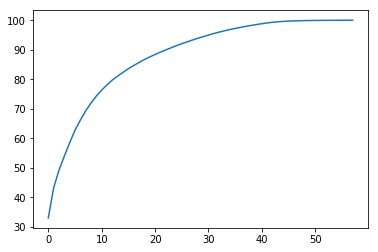

In [78]:
# PCA to figure out the optimum number of features. 

# sliced off the target. which is is tumour or not. 
df = new_df.iloc[:, 1:]
df_norm = (df - df.mean()) / df.std()

pca = PCA()
pca.fit_transform(df_norm.values)
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var)
plt.show()
# about 30~ 40 features gives 95%

In [81]:
N_COMPONENTS = 35
pca2 = PCA(n_components=N_COMPONENTS)
pca2.fit_transform(df_norm.values)

data_scaled = pd.DataFrame(preprocessing.scale(df), columns=df.columns)

pc_names = ["PC-"+str(i+1) for i in range(N_COMPONENTS)]

print(pd.DataFrame(pca2.components_, columns=data_scaled.columns, index=pc_names))

         let-7a   let-7a*    let-7b   let-7b*    let-7c   let-7c*    let-7d  \
PC-1   0.023626  0.050141  0.059529  0.044147  0.029303  0.030311  0.035405   
PC-2  -0.035742 -0.038681 -0.004638 -0.059387 -0.050660 -0.034365 -0.028374   
PC-3   0.056657 -0.050334 -0.006679 -0.031023  0.044436 -0.016572  0.095206   
PC-4   0.035516 -0.032935 -0.009236 -0.019187  0.035114 -0.014287 -0.039059   
PC-5   0.041930 -0.000887  0.004475  0.016189  0.054459  0.014704 -0.035227   
PC-6  -0.029131 -0.006516 -0.006809 -0.017430 -0.049105 -0.032126  0.012487   
PC-7   0.076114 -0.062207 -0.010691 -0.047090  0.083174 -0.081497 -0.040233   
PC-8  -0.079145 -0.000889 -0.026320 -0.035780 -0.049174 -0.005721 -0.032045   
PC-9  -0.007951  0.006788  0.043351  0.045384  0.017367  0.089732  0.032070   
PC-10 -0.014075 -0.012229 -0.020368 -0.045894  0.004944 -0.067404  0.005062   
PC-11 -0.048697 -0.036916  0.012552 -0.002583 -0.012800 -0.007653  0.013054   
PC-12 -0.038469  0.018020  0.041876  0.006579 -0.038

In [76]:
y = new_df.is_tumour
target_names = ["normal", "tumour"]
colors = ['navy', 'darkorange']
lw = 1


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
Name: is_tumour, dtype: int64
